# **5. Bayes**

Se selccionan las variables explicativas y la respuesta.

In [1]:

from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import math
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, roc_auc_score, classification_report
)

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\diabetic_data_limpio.csv")

In [3]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"No": 0, "Yes": 1}) 

Se separan el conjunto de entrenamiento y test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [5]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [7]:
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo="Modelo"):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    print(f"\n{nombre_modelo}")
    print(f"Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")
    if auc:
        print(f"AUC: {auc:.3f}")
    print(classification_report(y_test, y_pred))

    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Curva ROC - {nombre_modelo}")
        plt.legend()
        plt.show()

    return {
        "Modelo": nombre_modelo,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "AUC": auc
    }


## **4.1.1 Clasificador Bayesiano estandar**

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:25:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


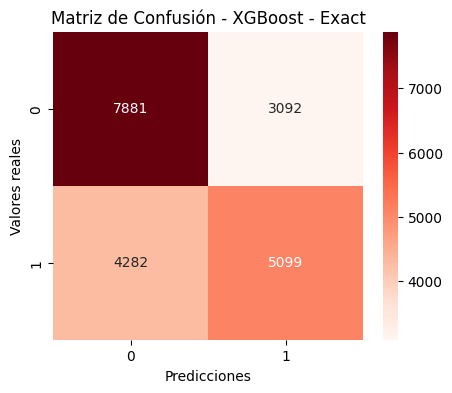


XGBoost - Exact
Accuracy: 0.638 | Precision: 0.623 | Recall: 0.544 | F1: 0.580
AUC: 0.686
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     10973
           1       0.62      0.54      0.58      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.63     20354



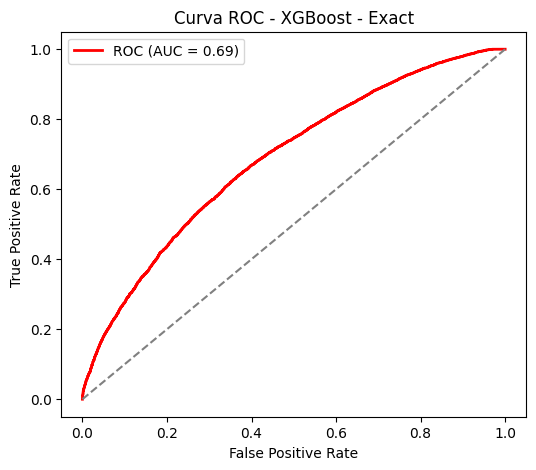

In [8]:
resultados_xgb = []

# 🔹 3.1 XGBoost estándar (exact)
start = time.time()
xgb_exact = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="exact",
        use_label_encoder=False,
        random_state=42,
        n_estimators=200
    ))
])
xgb_exact.fit(X_train, y_train)
end = time.time()

metrics_exact = evaluar_modelo(xgb_exact, X_test, y_test, "XGBoost - Exact")
metrics_exact["Tiempo (s)"] = round(end - start, 3)
resultados_xgb.append(metrics_exact)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:26:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


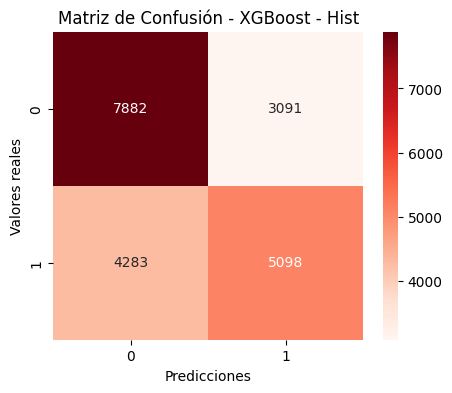


XGBoost - Hist
Accuracy: 0.638 | Precision: 0.623 | Recall: 0.543 | F1: 0.580
AUC: 0.686
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     10973
           1       0.62      0.54      0.58      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.63     20354



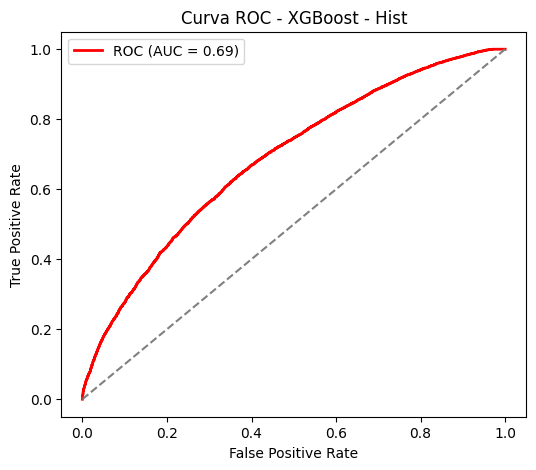

In [9]:
start = time.time()
xgb_hist = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        use_label_encoder=False,
        random_state=42,
        n_estimators=200
    ))
])
xgb_hist.fit(X_train, y_train)
end = time.time()

metrics_hist = evaluar_modelo(xgb_hist, X_test, y_test, "XGBoost - Hist")
metrics_hist["Tiempo (s)"] = round(end - start, 3)
resultados_xgb.append(metrics_hist)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:26:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:26:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:26:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0

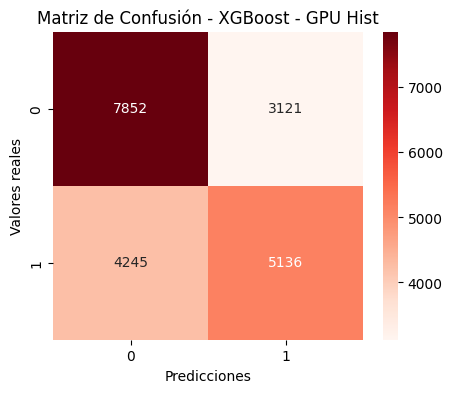


XGBoost - GPU Hist
Accuracy: 0.638 | Precision: 0.622 | Recall: 0.547 | F1: 0.582
AUC: 0.685
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     10973
           1       0.62      0.55      0.58      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.64     20354



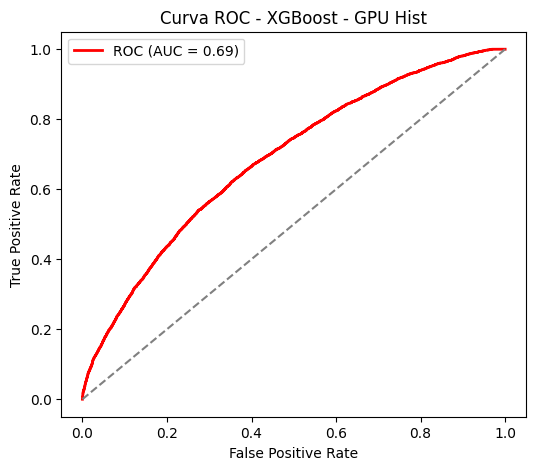

In [10]:
try:
    start = time.time()
    xgb_gpu = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="gpu_hist",
            use_label_encoder=False,
            random_state=42,
            n_estimators=200
        ))
    ])
    xgb_gpu.fit(X_train, y_train)
    end = time.time()

    metrics_gpu = evaluar_modelo(xgb_gpu, X_test, y_test, "XGBoost - GPU Hist")
    metrics_gpu["Tiempo (s)"] = round(end - start, 3)
    resultados_xgb.append(metrics_gpu)
except Exception as e:
    print("⚠️ GPU no disponible o error en XGBoost GPU:", e)

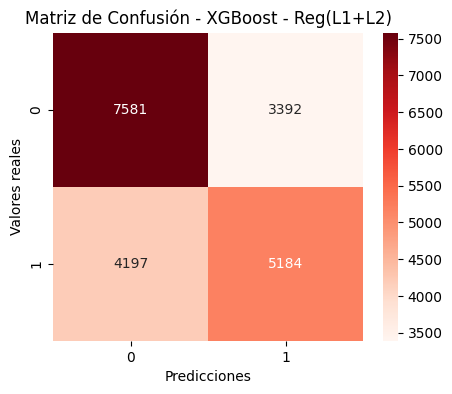


XGBoost - Reg(L1+L2)
Accuracy: 0.627 | Precision: 0.604 | Recall: 0.553 | F1: 0.577
AUC: 0.676
              precision    recall  f1-score   support

           0       0.64      0.69      0.67     10973
           1       0.60      0.55      0.58      9381

    accuracy                           0.63     20354
   macro avg       0.62      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354



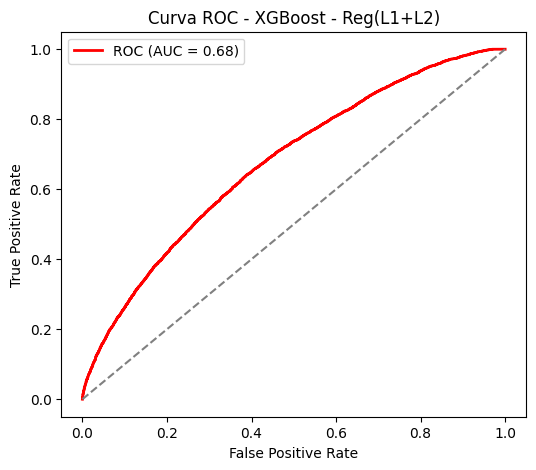

In [15]:
# 🔹 3.3 XGBoost con regularización más fuerte
start = time.time()
xgb_reg = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    reg_lambda=5.0,
    reg_alpha=2.0,
    n_estimators=500,
    random_state=42
)
xgb_reg.fit(preprocessor.fit_transform(X_train), y_train)
end = time.time()

metrics_reg = evaluar_modelo(xgb_reg, preprocessor.transform(X_test), y_test, "XGBoost - Reg(L1+L2)")
metrics_reg["Tiempo (s)"] = round(end - start, 3)
resultados_xgb.append(metrics_reg)



🔍 Resultados comparativos - XGBoost optimizadas:

                 Modelo  Accuracy  Precision    Recall        F1       AUC  \
0    XGBoost - GPU Hist  0.638106   0.622018  0.547490  0.582379  0.685457   
1       XGBoost - Exact  0.637712   0.622513  0.543545  0.580355  0.686378   
2        XGBoost - Hist  0.637712   0.622542  0.543439  0.580307  0.686419   
3  XGBoost - Reg(L1+L2)  0.627149   0.604478  0.552606  0.577379  0.675655   

   Tiempo (s)  
0       2.201  
1       9.000  
2       1.525  
3       5.455  


C:\Users\taran\AppData\Local\Temp\ipykernel_27392\3971285669.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Modelo", x="F1", data=tabla_resultados, palette="Reds_r")


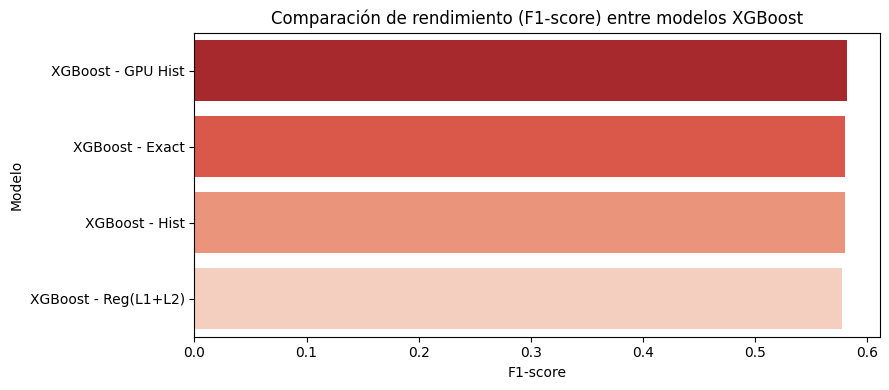

C:\Users\taran\AppData\Local\Temp\ipykernel_27392\3971285669.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Modelo", x="Tiempo (s)", data=tabla_resultados, palette="Reds_r")


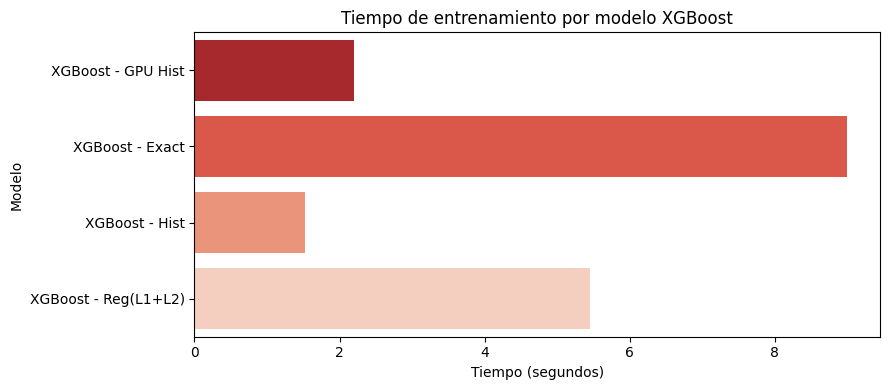

In [16]:
tabla_resultados = pd.DataFrame(resultados_xgb).sort_values("F1", ascending=False).reset_index(drop=True)
print("\n🔍 Resultados comparativos - XGBoost optimizadas:\n")
print(tabla_resultados)

# =====================================
# 5️⃣ Visualizaciones comparativas
# =====================================
plt.figure(figsize=(9, 4))
sns.barplot(y="Modelo", x="F1", data=tabla_resultados, palette="Reds_r")
plt.title("Comparación de rendimiento (F1-score) entre modelos XGBoost")
plt.xlabel("F1-score")
plt.ylabel("Modelo")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 4))
sns.barplot(y="Modelo", x="Tiempo (s)", data=tabla_resultados, palette="Reds_r")
plt.title("Tiempo de entrenamiento por modelo XGBoost")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Modelo")
plt.tight_layout()
plt.show()